In [1]:
import netCDF4 as nc
import matplotlib.pyplot as plt
from matplotlib.colors import from_levels_and_colors
import numpy as np
from matplotlib import animation
from matplotlib.colors import BoundaryNorm
import matplotlib.colors as cols
import matplotlib as mpl
from mpl_toolkits.basemap import Basemap
from matplotlib import ticker, cm
import seaborn as sns

In [2]:
## the length
data1=nc.Dataset('/ihesp/user/xiliangdiao/ihespdata/ocn300/B.E.13.B1850C5.ne120_t12.sehires38.003.sunway_02.pop.h.0167-09.TAUX.nc')
lont = data1.variables['ULONG'][:600,1100:1600]
latt = data1.variables['ULAT'][:600,1100:1600]
latt[latt == -1.0] = np.nan

a = np.arange(0,600)
import math
#math.cos(math.radians(latt[:,3][399]))
wholedis = np.zeros(600)
for j in a:
    wholedis[j] = 111.34* math.cos(math.radians(latt[:,200][j]))

In [3]:
wholedis = wholedis * 1000 # 地球一度的距离(m)

In [4]:
# each layer depth (m)
data1=nc.Dataset('/ihesp/user/xiliangdiao/ihespdata/ocn300/B.E.13.B1850C5.ne120_t12.sehires38.003.sunway_02.pop.h.0330-12.dz.nc')
lev1 = data1.variables['dz'][:]/100

In [5]:
data=nc.Dataset('/ihesp/user/xiliangdiao/ihespdata/ocn300/B.E.13.B1850C5.ne120_t12.sehires38.003.sunway_02.pop.h.0305-09.VVEL.nc')
plotvar = data.variables['VVEL'][0,:,:]
v = plotvar[:,320:426,1100:1600]

##############################################
plotvar[plotvar == -0.009999999776482582]= np.nan
plotvar[plotvar == -1.0]= np.nan
where_are_nan = np.isnan(plotvar)
plotvar[where_are_nan] = 0
v = v/100 # m/s

In [6]:
data=nc.Dataset('/ihesp/user/xiliangdiao/ihespdata/ocn300/B.E.13.B1850C5.ne120_t12.sehires38.003.sunway_02.pop.h.0305-09.SALT.nc')
plotvar = data.variables['SALT'][0,:,:]
salinity = plotvar[:,320:426,1100:1600]

##############################################
salinity[salinity == -1000.0] = np.nan

In [18]:
###################################
#####  volume transport
a = np.arange(0,106)
b = np.arange(0,500)
A1= np.zeros([62,106,500])
for j in a:
    for i in b:
        A1[:,j,i] = v[:,j,i]* lev1[:]* 0.1 * wholedis[j] * salinity[:,j,i]
#####unit (m^3/s)

In [22]:
A1[A1>100000000000000]=0
final = np.nansum(A1,axis=2)

/scratch/user/xiliangdiao/.conda/envs/python3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in greater
  """Entry point for launching an IPython kernel.


In [23]:
final.shape

(62, 106)

In [10]:
num = np.arange(1,699,1)
stream = np.zeros([600,1300])
count = 0

stream[:,0] = final[:,0]
for i in num:
    stream[:,count+1] = stream[:,count]+final[:,i]
    count = count + 1

ValueError: could not broadcast input array from shape (62) into shape (600)

In [ ]:
streamSV = stream/1000000

In [ ]:
final[final>0]=np.nan

In [24]:
data1=nc.Dataset('/ihesp/user/xiliangdiao/ihespdata/ocn300/depth.nc')
A = data1.variables['z_t'][:]/100

In [25]:
B = latt[320:426,200]
xx, yy = np.meshgrid(B, A)

In [26]:
yy.shape

(62, 106)

In [27]:
nice_cmap=sns.diverging_palette(245, 15, n=13,as_cmap=True)
#nice_cmap=sns.diverging_palette(245, 10, n=10,as_cmap=True)
lev_cmap = nice_cmap([1,10,30,50,70,90,100,110,120,130,140,150,160,170,180,190,200,210,230,240]) 
new_cmap = cols.ListedColormap(lev_cmap,"praj_cmap")
my_font = {'fontname':'Cambria', 'size':'17'}
nice_levels = [-4,-3,-2,-1,0,1,2,3,4]

TypeError: Input z must be at least a 2x2 array.

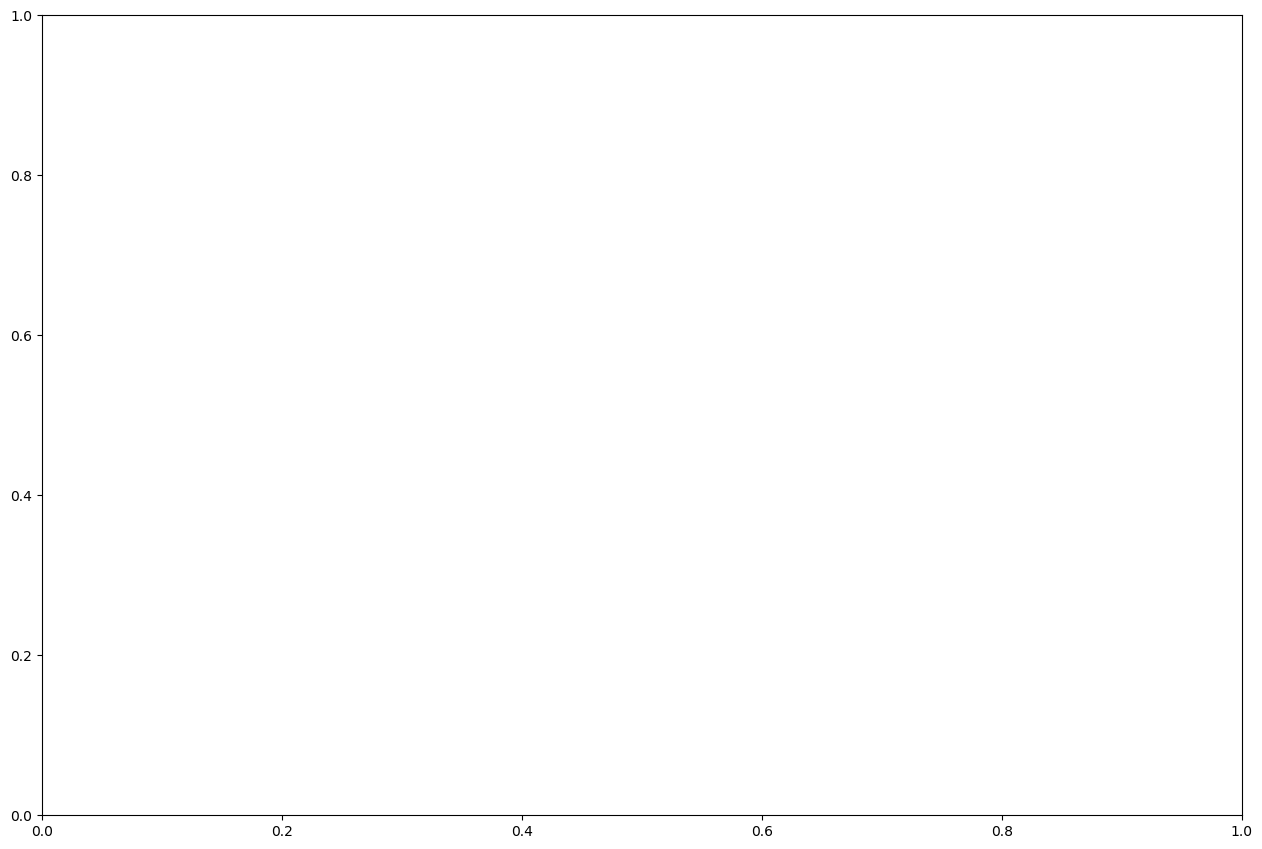

In [28]:
# plot the result
fig = plt.figure(figsize=(15, 10), dpi=100)
ax0 = fig.add_axes([0.1, 0.1, 0.8, 0.8])
#ax0 = plt.subplot(2,1,1)
im = ax0.contourf(xx[:,:], yy[:,:], final[:,200:]/1000000,levels = nice_levels,spacing = 'uniform',cmap=nice_cmap,interpolation='none',extend='both')
cbar = fig.colorbar(im,ax=ax0, ticks=nice_levels,extendfrac='auto')
cbar.set_label('(Sv*psu)', **my_font)
im.cmap.set_over('firebrick')
im.cmap.set_under('darkblue')
ax0.invert_yaxis()
plt.ylabel('Depth (m)',**my_font)
plt.xlabel('Latitude',**my_font)
plt.savefig("vertical-1.png",bbox_inches='tight')

In [ ]:
xx